# Neural Networks and Deep Learning Notes

Notes and equations from [neuralnetworksanddeeplearning.com](http://neuralnetworksanddeeplearning.com/)

# Chapter 1

## Perceptrons

The **simple perceptron** computes its output as a weighted sum of the inputs

$
\begin{eqnarray}
  \mbox{output} & = & \left\{ \begin{array}{ll}
      0 & \mbox{if } \sum_j w_j x_j \leq \mbox{ threshold} \\
      1 & \mbox{if } \sum_j w_j x_j > \mbox{ threshold}
      \end{array} \right.
\tag{1}\end{eqnarray}
$

The notation can be adjusted to use a dot product and a **bias** term instead of the threshold. The bias controls how easy or difficult it is to get the perceptron to output a 1.

$
\begin{eqnarray}
  \mbox{output} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } w\cdot x + b \leq 0 \\
      1 & \mbox{if } w\cdot x + b > 0
    \end{array}
  \right.
\tag{2}\end{eqnarray}
$

The perceptron can implement a NAND gate:

![](http://neuralnetworksanddeeplearning.com/images/tikz2.png)

$00 = -2 * 0 + -2 * 0 + 3 = 3 \rightarrow 1$

$01 = -2 * 0 + -2 * 1 + 3  = 1 \rightarrow 1$

$10 = -2 * 1 + -2 * 0 + 3  = 1 \rightarrow 1$

$11 = -2 * 1 + -2 * 1 + 3  = -1 \rightarrow 0$

The perceptron can implement a two bit adder. All weights are -2 except for the one marked -4 and all biases are 3:

![](http://neuralnetworksanddeeplearning.com/images/tikz6.png)

## Sigmoid Neurons

Perceptrons are very sensitive to changes in their input (small input change can cause large output change), which makes it difficult to apply learning algorithms to them. Sigmoid neurons help to alleviate this because the sigmoid function has smaller changes in its output - effectively a smoothed out perceptron.

The **sigmoid function**:

$\begin{eqnarray} 
  \sigma(z) \equiv \frac{1}{1+e^{-z}}.
\tag{3}\end{eqnarray}$

The output of a sigmoid neuron with weights $w_i$, inputs $x_i$, and bias $b$:

$\begin{eqnarray} 
  \frac{1}{1+\exp(-\sum_j w_j x_j-b)}.
\tag{4}\end{eqnarray}$

Behavior: when $w \cdot x + b$ is large, the sigmoid output approaches 1; when it's small, the output approaches 0. The outputs are continuous values between 0 and 1, so you need some heuristic or convention to interpret meaning from them. For example, you might say that any value greater than or equal to 0.5 indicates a "yes", and any value less than 0.5 indicates a "no".

## Exercises

1) Suppose we take all the weights and biases in a network of perceptrons, and multiply them by a constant, $c > 0$. Show that the behavior of the network doesn't change.

The perceptron's output is determined by the weighted sum of the inputs and bias compared to 0, $w \cdot x + b > 0$. Multiplying both $w$ and $b$ by a constant $c$ gives us the inequality $cw \cdot x + cb = c(w \cdot x + b) > 0$. We can show they are equal:

$
cw \cdot x + cb > 0
\\ c(w \cdot x + b) > 0
\\ w \cdot x + b > \frac{0}{c}
\\ w \cdot x + b > 0
$

The same can be easily shown for the $\leq 0$ inequality.

2) Given a network of perceptrons and a fixed input to the network. The weights and biases are such that $w \cdot x + b \neq 0$ for input $x$ to any perceptron in the network. Replace all perceptrons by sigmoid neurons. Multiply the weights and biases by a positive constant $c > 0$. Show that in the limit as $c \rightarrow \infty$, the behavior of this network of sigmoid neurons is exactly the same as the network of perceptrons. How can this fail when $w \cdot x + b = 0$ for one of the perceptrons?

It seems I should show that as $c \rightarrow \infty$, $\frac{1}{1 + e ^ {-c(w \cdot x + b)}}$ "behaves" the same as $c(w \cdot x + b)$. I'm not certain how to approach the topic of "behavior" at a network level - should I show that they increase at the same rate? A single case could probably be worked out using the two bit adder network above.

## The Architecture of Neural Networks

Terminology

- Multilayer perceptrons are actually made up of sigmoid neurons (there can be other activation functions used as well).

## A simple network to classify handwritten digits

- Images will be 28 by 28, meaning the input layer has 27 x 27 = 784 neurons.
- There are ten output neurons - each will have an activation value between 0 and 1. The digit gets classified by taking the neuron with the highest activation value.
- You could also do a bit-wise output representation. This would have four neurons, each of which can represent 0 or 1. This would work because all digits from 0 to 9 can be represented with four binary bits (e.g. 0 = 0000, 4 = 0100, 9 = 1001). It turns out the 10-neuron representation performs better.

## Exercise

Suppose you had the 10-neuron output layer but wanted to downsample it to a 4-neuron (bit-wise) output layer. Find a set of weights that makes this possible. Assume that correct outputs in the 3rd layer (old output layer) have activation gte 0.99 and incorrect have activation < 0.01.

![](http://neuralnetworksanddeeplearning.com/images/tikz13.png)

We can consider this to be a linear system of equations, $Aw = B$, where $A$ is the activation values from the old output layer, $w$ is the matrix of weights we are looking for, and $B$ is the activation of the bit-wise encoded new output layer.

This allows us to simply populate the matrices $A$ and $B$ and solve for the weight matrix $w$.

$A$ and $B$ will look like this:

$A = \{\{0.99, 0.001, ...\}, \{0.001, 0.99, 0.001, ...\}, \{0.001, 0.001, 0.99, 0.001, ...\}, ... \}$
$B = \{\{0, 0, 0, 0\}, \{0, 0, 0, 1\}, ...\}$

See code below for the computed solution to this sytem of equations.

In [1]:
import numpy as np

A = np.full((10,10), 0.001)
B = np.full((10,4), 0)

# Fill in each digit with a 0.99 in A.
# Fill in the binary representation of each digit in B.
for i in range(0,10): 
    A[i][i] = 0.99
    B[i] = [int(b) for b in list('{0:04b}'.format(i))]

# Solve for w in Aw = B. This is the weight matrix.
w = np.linalg.solve(A, B)

# Print results.
print('Aw = b, A = :\n', A)
np.set_printoptions(precision=6)
print('Aw = b, w = :\n', w)
np.set_printoptions(precision=1)
np.set_printoptions(suppress=True)
print('Aw = b, B = :\n', np.dot(A,w))

Aw = b, A = :
 [[ 0.99   0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001]
 [ 0.001  0.99   0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001]
 [ 0.001  0.001  0.99   0.001  0.001  0.001  0.001  0.001  0.001  0.001]
 [ 0.001  0.001  0.001  0.99   0.001  0.001  0.001  0.001  0.001  0.001]
 [ 0.001  0.001  0.001  0.001  0.99   0.001  0.001  0.001  0.001  0.001]
 [ 0.001  0.001  0.001  0.001  0.001  0.99   0.001  0.001  0.001  0.001]
 [ 0.001  0.001  0.001  0.001  0.001  0.001  0.99   0.001  0.001  0.001]
 [ 0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.99   0.001  0.001]
 [ 0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.99   0.001]
 [ 0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.99 ]]
Aw = b, w = :
 [[-0.002024 -0.004049 -0.004049 -0.005061]
 [-0.002024 -0.004049 -0.004049  1.006062]
 [-0.002024 -0.004049  1.007074 -0.005061]
 [-0.002024 -0.004049  1.007074  1.006062]
 [-0.002024  1.007074 -0.004049 -0.005061]
 [-0.002024  1.007074 -0

/home/kzh/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((10, 4), 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


## Learning with Gradient Descent

### Notation

- $X$ denotes the matrix of all trainign input vectors.
- $x$ denotes a single 28 x 28 training input as a $784 \times 1$ vector.
- $w$ denotes the collection of all weights in the network.
- $b$ denotes the collection of all biases.
- $n$ is the total number of inputs.
- $a$ is the vector of outputs from the network given a single input $x$.
- $y(x)$ is the correct vector of outputs for a single input $x$.
- $\eta$ is the learning rate

### Quadratic cost function (aka mean squared error)

$C(w,b) = \frac{1}{2n} \sum_{x \in X} (y(x) - a)^2$

- Minimize this measure by adjusting $w$ and $b$ using gradient descent.
- We use this proxy measure of accuracy because classification accuracy alone is not a smooth function, so it's difficult to minimize.

### Gradient Descent Intuition

Repeatedly compute a gradient $\nabla C$, which is used to update the parameters to the cost function. This will move you towards the minimum of the cost function.

### Gradient Descent Explained Mathematatically for a Two-variable Cost Function

- Goal: Minimize the cost function $C(v_1, v_2)$.

- Strategy: Iteratively adjust $v_1$ and $v_2$ in order to reach a global minimum for $C$.

When $C(v_1, v_2)$ is changed by $(\Delta v_1, \Delta v_2)$, this results in a $\Delta C$ expressed:

$\Delta C = \frac{\partial C}{\partial v_1} \Delta v_1 + \frac{\partial C}{\partial v_2} \Delta v_2$

It's important to understand that $\frac{\partial C}{\partial v_1} \Delta v_1$ really means "the rate at which $C$ is changing with respect to $v_1$" (... $\frac{\partial C}{\partial v_1}$ ...) times the amount by which $v_1$ is changing ( ...$\Delta v_1$... ). This is analagous to saying "distance = velocity x duration". $\Delta C$ is just the sum of these distances for both $v_1$ and $v_2$.

- Checkpoint: How does $\Delta C$ affect $C$? 

$C \rightarrow C' = C + \Delta C$.

So if we can find values for $(\Delta v_1, \Delta v_2)$ such that $\Delta C$ is negative, then we can iteratively minimize $C$.

- Checkpoint: How do we find values for $(\Delta v_1, \Delta v_2)$ to make $\Delta C$ negative?

First we define the "gradient" of $C$ as:

$\nabla C = (\frac{\partial C}{\partial v_1}, \frac{\partial C}{\partial v_2})^T$

and the change in $v$ is defined as:

$\Delta v = (\Delta v_1, \Delta v_2)^T$

Remembering that $\frac{\partial C}{\partial v_1} \Delta v_1$ is two separate entities $\frac{\partial C}{\partial v_1}$ and $\Delta v_1$, we can rewrite $\Delta C$ in a more convenient way:

$
\Delta C = ((\frac{\partial C}{\partial v_1})(\Delta v_1) + (\frac{\partial C}{\partial v_2})(\Delta v_2))
\\ \\ \Delta C = (\frac{\partial C}{\partial v_1}, \frac{\partial C}{\partial v_2})^T \cdot (\Delta v_1, \Delta v_2)^T
\\ \\ \Delta C = \nabla C \cdot \Delta v
$

So we've re-written $\Delta C$ as the dot product of $\nabla C$ and $\Delta v$.

- Checkpoint: How do we choose $\Delta v$ to make $\Delta C$ negative?

We already know what $\nabla C$ and $\eta$ are. So for convenience, lets choose:

$\Delta v = -\eta \nabla C$.

This lets us re-write $\Delta C$ as:

$\Delta C = \nabla C \cdot -\eta \Delta v = -\eta (\nabla C)^2$

Because $-\eta (\nabla C)^2 < 0$, $\Delta C$ will always be negative, which is what we wanted in the first place.

- Checkpoint: How do we update $v$ to "move" towards minimizing $C$?

We've determined that choosing $\Delta v = -\eta \nabla C$ will eventually minimize $C$, so then we actually update $v$ as follows:

$v \rightarrow v' = v + \Delta v = v - \eta \nabla C$

Again, this guarantees that $\Delta C$ will always decrease.

### Gradient Descent for Multi-variable Cost Functions

Now you have $m$ variables $(v_1, ..., v_m)$.

Everything else is the same, just adjusted for the $m$ variables:

- Cost function: $C(v_1, ..., v_m)$.
- Gradient of $C$: $\nabla C = ( \frac{\partial C}{\partial v_1}, ..., \frac{\partial C}{\partial v_m})$.
- Change in $v$: $\Delta v = (\Delta v_1, ..., \Delta v_2) = -\eta \nabla C$.
- Change in $C$: $\Delta C = \nabla C \cdot \Delta v$.
- Update rule: $v \rightarrow v' = v - \eta \nabla C$.

### Application of Gradient Descent

- Finding the weights $w_k$ and biases $b_i$ to minimize the quadratic cost function.
- Update rules:
    - weights: $w_k \rightarrow w'_k = w_k - \eta \frac{\partial C}{\partial w_k}$
    - biases: $b_l \rightarrow b'_l - \eta \frac{\partial C}{\partial b_l}$

### Application of Stochastic Gradient Descent

- Gradient Descent can be expensive because it requires computing and storing a $\nabla C_x$ for each training sample $x$ to find $\nabla C = \frac{1}{n} \sum_x \nabla C_x$
- One solution to speed things up is **stochastic gradient descent**, which approximates $\nabla C$ by computing $\nabla C_x$ for a random subset of $m$ training samples, called a **mini-batch**:
- Approximated gradient:
    $\nabla C \approx \frac{1}{m} \sum_{j=1}^m \nabla C_{X_j}$
- Thus, the update functions also use an approximation:
    - weights: $w_k \rightarrow w'_k = w_k - \nabla C = w_k - \frac{\eta}{m} \sum_j \frac{\partial C_{X_j}}{\partial w_k}$ 
    - biases: $b_l \rightarrow b'_l = b_l - \frac{\eta}{m} \sum_j \frac{\partial C_{X_j}}{\partial b_l}$
- Sometimes the averaging is omited and the entire sum is used as the update value (e.g. when the amount of training samples is unknown at runtime).

### Exercise

An extreme version of gradient descent uses a mini-batch size of 1. Name 1 advantage and disadvantage:

- Advantage: computationally less expensive, arguably simpler to just compute one gradient at a time.
- Disadvantage: sensitive to outliers - if a very irregular sample is randomly selected, it could cause a jump in $C$ that doesn't progress towards minimizing it.

## Implementing our Network to Classify Digits

SGD Epoch 000: 07296/08000, cost = 0.0191
SGD Epoch 001: 07389/08000, cost = 0.0154
SGD Epoch 002: 07445/08000, cost = 0.0160
SGD Epoch 003: 07527/08000, cost = 0.0129
SGD Epoch 004: 07553/08000, cost = 0.0129
SGD Epoch 005: 07568/08000, cost = 0.0124
SGD Epoch 006: 07556/08000, cost = 0.0125
SGD Epoch 007: 07570/08000, cost = 0.0116
SGD Epoch 008: 07580/08000, cost = 0.0111
SGD Epoch 009: 07580/08000, cost = 0.0116
Validation: 1929 / 2000, 0.9645, cost = 0.0077


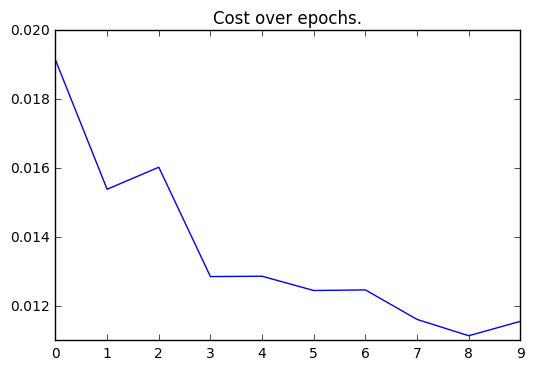

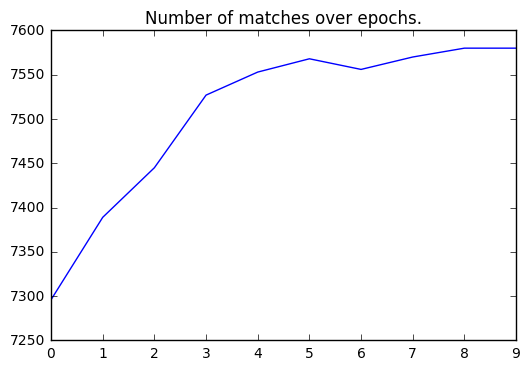

In [10]:
import numpy as np
import nndl_helpers as helpers
import random
import math
import matplotlib.pyplot as plt
# Static functions.

def sigmoid(z):
    '''Sigmoid activation.'''
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_deriv(z):
    '''Derivative of the sigmoid activation.
    Used in back prop to compute the output error and the layer errors.'''
    return sigmoid(z) * (1 - sigmoid(z))

def quadratic_cost(examples, outputs):
    '''Compute the quadratic cost for the outputs relative the 
    examples (x,y) pairs. Assumes that outputs is a list of column 
    vectors representing the output activations for the given examples.'''
    n = len(examples)
    error_sum = 0
    for ((x,y), o) in zip(examples, outputs):
        error_sum += math.pow(np.sum(y - o), 2)
    return (1 / (2*n)) * error_sum

def quadratic_cost_deriv(output_activations, y):
    '''Derivative of the quadratic cost function. Used in back prop
    to compute the output error. Assumes output activations and y are
    equal-sized column vectors.'''
    return (output_activations - y)

class Network(object):

    def __init__(self, sizes=[10,10]):
        '''Initialize member variables and randomly initialize 
        bias and weight values.'''
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        
        # By convention, there are no weights and biases for input layer.
        # Biases are a (layer size X 1) column vector.
        self.biases = [np.random.randn(sz, 1) for sz in sizes[1:]]
        
        # Each layer has a (m x n) matrix of weights,
        # where m is the size of the layer and n is the size of 
        # the subsequent layer. 
        # e.g. layer 1 has size 10, layer 2 has size 11, then layer 1's
        # weights are a (10 x 11) matrix.
        self.weights = [np.random.randn(m,n) 
                        for n,m in zip(sizes[:-1],sizes[1:])]
        return
    
    def SGD(self, train, epochs=30, mini_batch_size=10, eta=3.0, test_data=None):
        '''Stochastic gradient descent trains the NN in mini-batches.
        train should be a list of tuples (x,y) representing the training
        samples and their correct outputs.'''
        
        correct_list = []
        cost_list = []
        
        # SGD broken into epochs.
        # Each epoch shuffles the training data into mini-batches
        # and iterates over them to incrementally update weights
        # and biases using back propogation.
        for epoch in range(epochs):
            
            # Shuffle the training data and split it into
            # non-overlapping mini-batches.
            random.shuffle(train)
            mini_batches = [
                train[k:k+mini_batch_size]
                for k in range(0, len(train), mini_batch_size)]
            
            # Use each of the mini batches to update biases
            # and weights using back propogation.
            for mb in mini_batches:
                self.update_by_mini_batch(mb, eta)
                
            # Evaluate on test data if given, print results.
            if test_data:
                correct, cost = self.evaluate(test_data)
                correct_list.append(correct)
                cost_list.append(cost)
                print("SGD Epoch %03d: %05d/%05d, cost = %.4lf" %
                     (epoch, correct, len(test_data), cost))
            else:
                print("SGD Epoch %d complete" % (epoch))
        
        return correct_list, cost_list
    
    def update_by_mini_batch(self, mini_batch, eta):
        '''Use back propogation algorithm to compute the gradients
        for each (x,y) pair in the mini_batch. Use those gradients
        to update self.weights and self.biases at each iteration.'''
        
        # Every weight and bias has a gradient value.
        # All are initialized as 0.
        grad_b_sum = [np.zeros(b.shape) for b in self.biases]
        grad_w_sum = [np.zeros(w.shape) for w in self.biases]
        
        # Loop over the (x,y) pairs. Compute the bias and weight
        # gradients using back prop.
        for x,y in mini_batch:
            # Back prop returns matrices of the gradient corresponding
            # to each weight and bias.
            delta_grad_b, delta_grad_w = self.back_prop(x,y)
            
            # Add the gradients to the running sums.
            grad_b_sum = [gb + dgb for gb, dgb in zip(grad_b_sum, delta_grad_b)]
            grad_w_sum = [gw + dgw for gw, dgw in zip(grad_w_sum, delta_grad_w)]
            
        # Update the weights and biases.
        self.weights = [w - ((eta / len(mini_batch)) * gwsum) 
                        for w, gwsum in zip(self.weights, grad_w_sum)]
        self.biases = [b - ((eta / len(mini_batch)) * gbsum)
                       for b, gbsum in zip(self.biases, grad_b_sum)]
            
        return
    
    def back_prop(self, x, y):
        '''Execute back propogation for a single (x,y) (input, output)
        training pair. Return a tuple of the gradients (grad_b, grad_w)
        where grad_b and grad_w are layer-by-layer lists of numpy arrays.
        
        grad_w[l][j][k] is the gradient for the weight from neuron k in layer
        l - 1 to neuron j in layer l.
        
        grad_b[l][j] is the gradient for the bias for neuron j in layer l.
        
        '''
        
        # Both gradients initialized as zeros.
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        
        # Duplicate forward prop, tracking a and z to compute deltas.
        a = x   # First activation is the input.
        A = [a] # List of all activations.
        Z = []  # Keep track of the inner activation terms.
        
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, a) + b
            Z.append(z)
            a = sigmoid(z)
            A.append(a)
            
        # Backward pass, compute the error first.
        delta = quadratic_cost_deriv(A[-1], y) * sigmoid_deriv(Z[-1])
        grad_b[-1] = delta
        grad_w[-1] = np.dot(delta, A[-2].transpose())
        
        # Python negative indexing used to loop backward through layers.
        for l in range(2, self.num_layers):
            sd = sigmoid_deriv(Z[-l])
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sd
            grad_b[-l] = delta
            grad_w[-l] = np.dot(delta, A[-l - 1].transpose())
        
        return grad_b, grad_w
        
    def evaluate(self, validate):
        '''Evaluate using the member variable biases, weights and the given
        validation data. The validation data should be a list of tuples (x,y).
        Return the number of correct classifications and the cost.'''
        
        # Compute outputs for each (x,y) pair using forward prop.
        outputs = [self.forward_prop(x) for (x,y) in validate]
        
        num_matches = sum([int(np.argmax(o) == np.argmax(y))
                          for (o, (x,y)) in zip(outputs, validate)])
        
        
        cost = quadratic_cost(validate, outputs)
        
        return num_matches, cost
    
    def forward_prop(self, inputs):
        '''Computes the network output given the input a.
        Uses biases and weights to multiply the activations as
        they pass through the network.'''
        
        # Inputs are treated as the first activation.
        a = inputs
        
        # The activation at layer i is the sigmoid function
        # evaluated on the current weights and biases and the
        # activation from layer i - 1.
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w,a) + b)
        
        # The output is the last activation.
        outputs = a
        return outputs

# Retrieve 60000 training, 8000 testing, 2000 validation samples.
train, test, validate = helpers.get_mnist_data()

net = Network([784,30,10])
num_matches_list, cost_list = net.SGD(train, epochs=10, mini_batch_size=10, eta=3.0, test_data=test)
num_matches, cost = net.evaluate(validate)

print('Validation: %d / %d, %.4lf, cost = %.4lf' %
    (num_matches, len(validate), num_matches / len(validate), cost))

plt.title('Cost over epochs.')
plt.plot(cost_list)
plt.show()

plt.title('Number of matches over epochs.')
plt.plot(num_matches_list)
plt.show()
